In [1]:
#Imports
import os, sys
path_to_package = os.path.abspath(os.path.join('../'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)


import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_stats(data, metric, model):
    mean = round(data[f'{metric}_{model}'].mean(), 4)
    var = round(data[f'{metric}_{model}'].var(), 4)
    std = round(data[f'{metric}_{model}'].std(), 4)

    return mean, var, std


def print_stats(data, metric):
    models = ["LinearRegression", "Ridge", "Lasso", "RandomForestRegressor", "SVR"]

    print()
    print(f"Metric {metric}")
    for model in models:
        print(model)
        print(f"    mean: {round(data[f'{metric}_{model}'].mean(), 4)}")
        print(f"    var: {round(data[f'{metric}_{model}'].var(), 4)}")
        print(f"    std: {round(data[f'{metric}_{model}'].std(), 4)}")
    print()


def plot_metric(data, metric):
    plt.figure(figsize=(25, 10))

    #, marker=".", markersize=2, linestyle='-', linewidth=1
    plt.plot(data["Unnamed: 0"], data[f"{metric}_Ridge"], label="Ridge")
    plt.plot(data["Unnamed: 0"], data[f"{metric}_Lasso"], label="Lasso")
    plt.plot(data["Unnamed: 0"], data[f"{metric}_RandomForestRegressor"], label="RandomForestRegressor")
    # plt.plot(data["Unnamed: 0"], data[f"{metric}_GradientBoostingRegressor"], label="GradientBoostingRegressor")
    plt.plot(data["Unnamed: 0"], data[f"{metric}_SVR"], label="SVR")

    plt.title(metric, fontsize=22)
    plt.xlabel("Archivos", fontsize=22)
    plt.ylabel("Valor", fontsize=22)

    
    plt.legend()
    plt.show()


def plot_metric(data, metric, model):
    plt.figure(figsize=(25, 10))

    #, marker=".", markersize=2, linestyle='-', linewidth=1
    plt.plot(data["Unnamed: 0"], data[f"{metric}_{model}"], label=model)

    plt.title(metric, fontsize=22)
    plt.xlabel("Archivos", fontsize=22)
    plt.ylabel("Valor", fontsize=22)

    
    plt.legend()
    plt.show()

In [3]:
phenotypes = [
    "SM300-Efficiency", "SM300-Rate", "SM300-Lag", "SM300-AUC",
    "SM60-Efficiency",  "SM60-Rate",  "SM60-Lag",  "SM60-AUC",
    "Ratio-Efficiency", "Ratio-Rate", "Ratio-Lag", "Ratio-AUC",
]

phenotypes = phenotypes[:1]

stats_dict = {
    "phenotype": [],
    "model": [],
    "r2_mean": [],
    "r2_var": [],
    "r2_std": [],
    "MAE_mean": [],
    "MAE_var": [],
    "MAE_std": [],
    "MSE_mean": [],
    "MSE_var": [],
    "MSE_std": [],
    "RMSE_mean": [],
    "RMSE_var": [],
    "RMSE_std": []
}

metrics = ["r2", "MAE", "MSE", "RMSE"]
models = ["LinearRegression", "Ridge", "Lasso", "RandomForestRegressor", "SVR"]

for phenotype in phenotypes:
    data = pd.read_csv(f'/home/khaldrem/code/sc_regmod/scripts/evaluation_metrics/exp_1_evaluation_metrics.csv')

    for model in models:
        stats_dict["phenotype"].append(phenotype)
        stats_dict["model"].append(model)

        for metric in metrics:
            mean, var, std = get_stats(data, metric, model)
    
            stats_dict[f"{metric}_mean"].append(mean)
            stats_dict[f"{metric}_var"].append(var)
            stats_dict[f"{metric}_std"].append(std)


stats_df = pd.DataFrame.from_dict(stats_dict)


In [4]:
#Get model with the less MAE any phenotype
print(f"Model with the less MAE any phenotype:  {stats_df[(stats_df['model'] != 'LinearRegression') & (stats_df['MAE_mean'] == stats_df['MAE_mean'].min())]['model'].tolist()}")
print()

#Get model with less MAE per phenotype
print("Model with less MAE per phenotype")
for phenotype in phenotypes:
    print(f"Phenotype: {phenotype}")
    t = stats_df[(stats_df['phenotype'] == "SM300-Efficiency") & (stats_df['model'] != 'LinearRegression')]

    print(f"    Model:  {t[t['MAE_mean'] == t['MAE_mean'].min()]['model'].tolist()[0]}")

Model with the less MAE any phenotype:  ['Ridge']

Model with less MAE per phenotype
Phenotype: SM300-Efficiency
    Model:  Ridge


In [5]:
#Get model with the less MAE any phenotype
print(f"Model with the less MAE any phenotype (without Lasso):  {stats_df[(stats_df['model'] != 'LinearRegression') & (stats_df['model'] != 'Lasso') & (stats_df['MAE_mean'] == stats_df['MAE_mean'].min())]['model'].tolist()}")
print()

#Get model with less MAE per phenotype (without Lasso)
print("Model with less MAE per phenotype")
for phenotype in phenotypes:
    print(f"Phenotype: {phenotype}")
    t = stats_df[(stats_df['phenotype'] == "SM300-Efficiency") & (stats_df['model'] != 'LinearRegression') & (stats_df['model'] != 'Lasso')]

    print(f"    Model:  {t[t['MAE_mean'] == t['MAE_mean'].min()]['model'].tolist()[0]}")

Model with the less MAE any phenotype (without Lasso):  ['Ridge']

Model with less MAE per phenotype
Phenotype: SM300-Efficiency
    Model:  Ridge


In [6]:
data = pd.read_csv(f'/home/khaldrem/code/sc_regmod/scripts/evaluation_metrics/exp_1_evaluation_metrics.csv')
data.head()

,Unnamed: 0,filename,phenotype,r2_LinearRegression,r2_Ridge,r2_Lasso,r2_RandomForestRegressor,r2_SVR,MAE_LinearRegression,MAE_Ridge,...,MSE_LinearRegression,MSE_Ridge,MSE_Lasso,MSE_RandomForestRegressor,MSE_SVR,RMSE_LinearRegression,RMSE_Ridge,RMSE_Lasso,RMSE_RandomForestRegressor,RMSE_SVR
0,0,YCL059C,SM300-Efficiency,0.366475,0.365693,-0.003481,0.139235,-0.037389,0.123147,0.123651,...,0.023342,0.023370,0.036972,0.031714,0.038222,0.023342,0.023370,0.036972,0.031714,0.038222
1,1,YBR004C,SM300-Efficiency,0.275029,0.298932,-0.003481,0.224356,-0.030544,0.129197,0.126201,...,0.026711,0.025830,0.036972,0.028578,0.037969,0.026711,0.025830,0.036972,0.028578,0.037969
2,2,YDR241W,SM300-Efficiency,0.156842,0.159783,-0.003481,-0.247949,-0.038030,0.138021,0.137508,...,0.031065,0.030957,0.036972,0.045979,0.038245,0.031065,0.030957,0.036972,0.045979,0.038245
3,3,YEL023C,SM300-Efficiency,0.136651,0.190498,-0.003481,-0.161677,-0.026974,0.145354,0.139825,...,0.031809,0.029825,0.036972,0.042801,0.037838,0.031809,0.029825,0.036972,0.042801,0.037838
4,4,YMR303C,SM300-Efficiency,0.053738,0.193623,-0.003481,0.287751,-0.029871,0.147535,0.138094,...,0.034864,0.029710,0.036972,0.026242,0.037945,0.034864,0.029710,0.036972,0.026242,0.037945


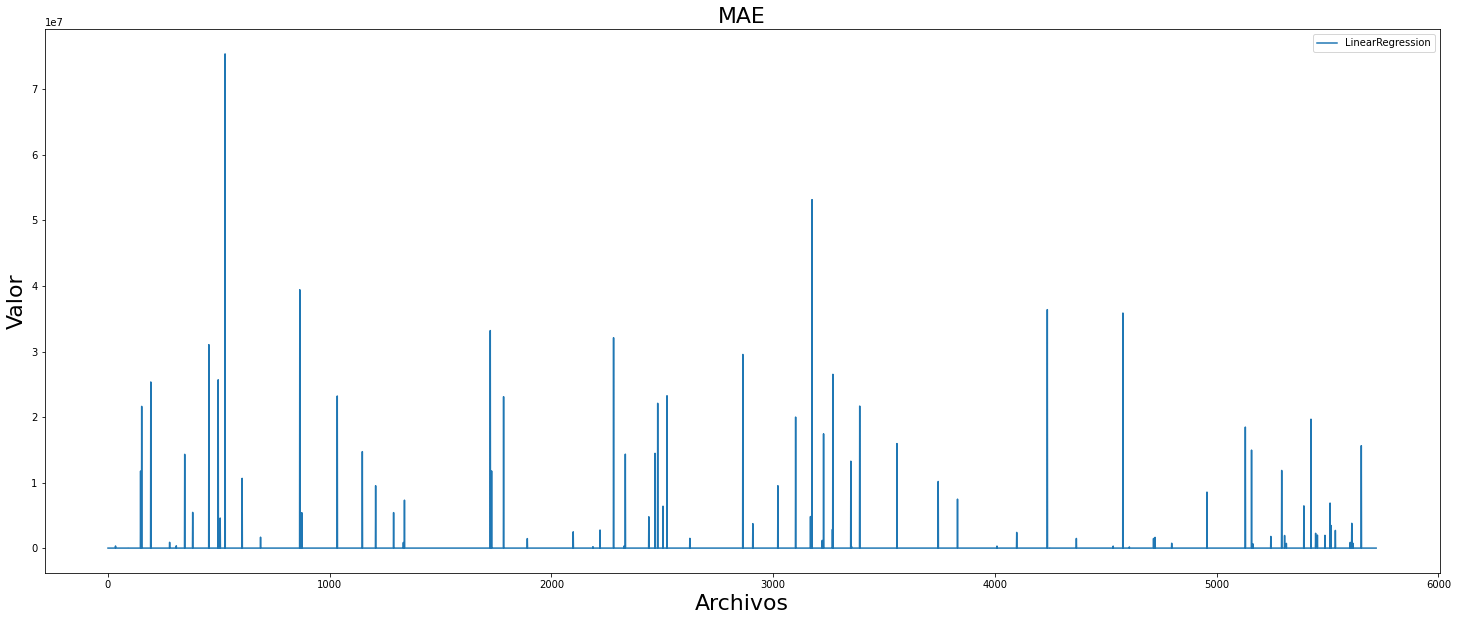

In [7]:
plot_metric(data, "MAE", "LinearRegression")

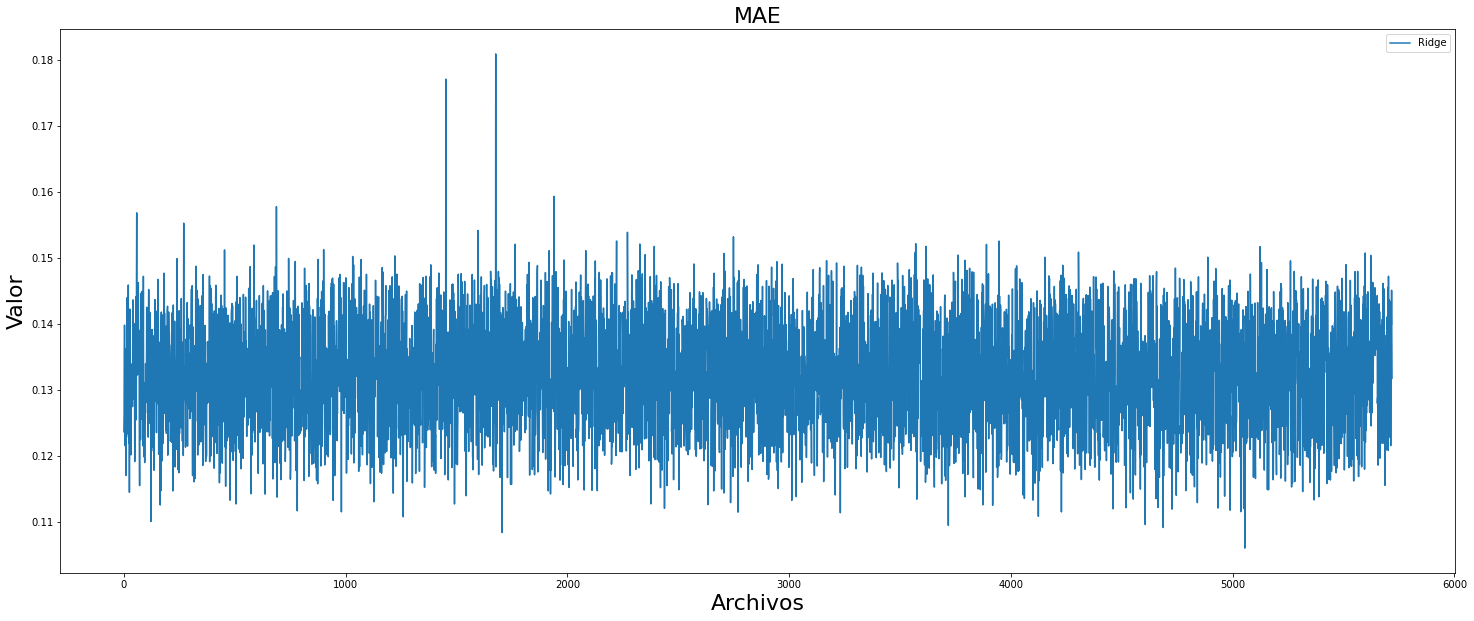

In [8]:
plot_metric(data, "MAE", "Ridge")

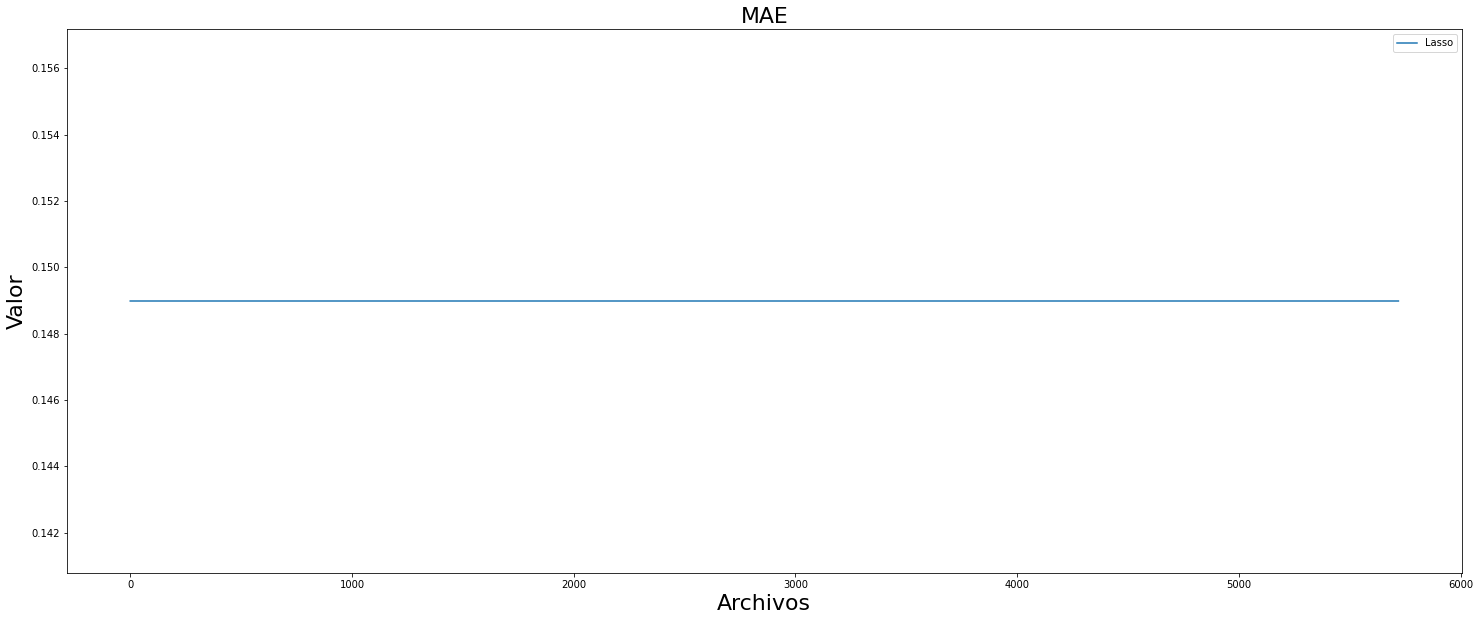

In [9]:
plot_metric(data, "MAE", "Lasso")

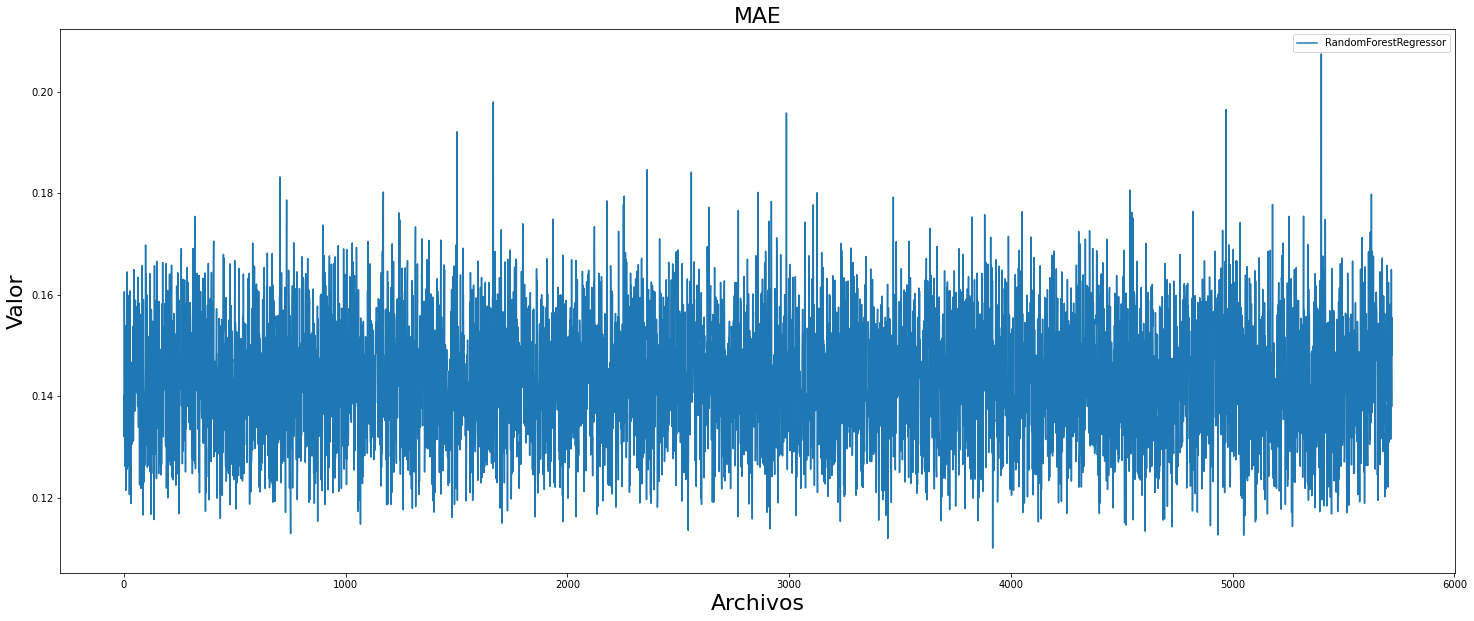

In [10]:
plot_metric(data, "MAE", "RandomForestRegressor")

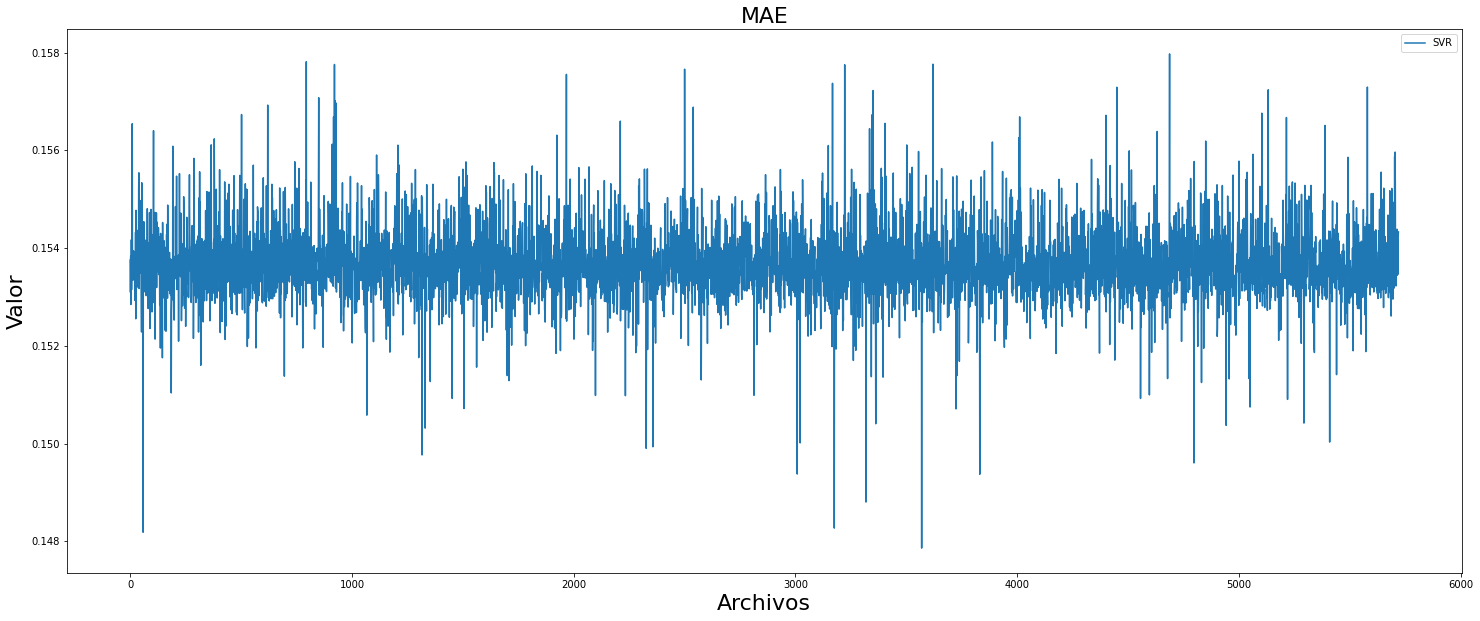

In [11]:
plot_metric(data, "MAE", "SVR")

In [13]:
print_stats(data, "MAE")


Metric MAE
LinearRegression
    mean: 170083.3833
    var: 4563854642735.705
    std: 2136318.0107
Ridge
    mean: 0.1322
    var: 0.0001
    std: 0.0084
Lasso
    mean: 0.149
    var: 0.0
    std: 0.0
RandomForestRegressor
    mean: 0.143
    var: 0.0002
    std: 0.0127
SVR
    mean: 0.1537
    var: 0.0
    std: 0.0007



In [24]:
def plot_boxplot_metric(data, metric):
    data_plot = {}
    models = ["Ridge", "Lasso", "RandomForestRegressor", "SVR"]

    for model in models:
        data_plot[model] = data[f"{metric}_{model}"]

    

    # plt.figure(figsize=(25, 10))
    fig, ax = plt.subplots(figsize=(25, 15))
    ax.boxplot(data_plot.values())
    ax.set_title('Error absoluto medio (MAE)', fontsize=20)
    ax.set_xlabel('Modelos de regresión', fontsize=16)
    ax.set_ylabel('Valor', fontsize=16)
    
    ax.set_xticklabels(data_plot.keys())


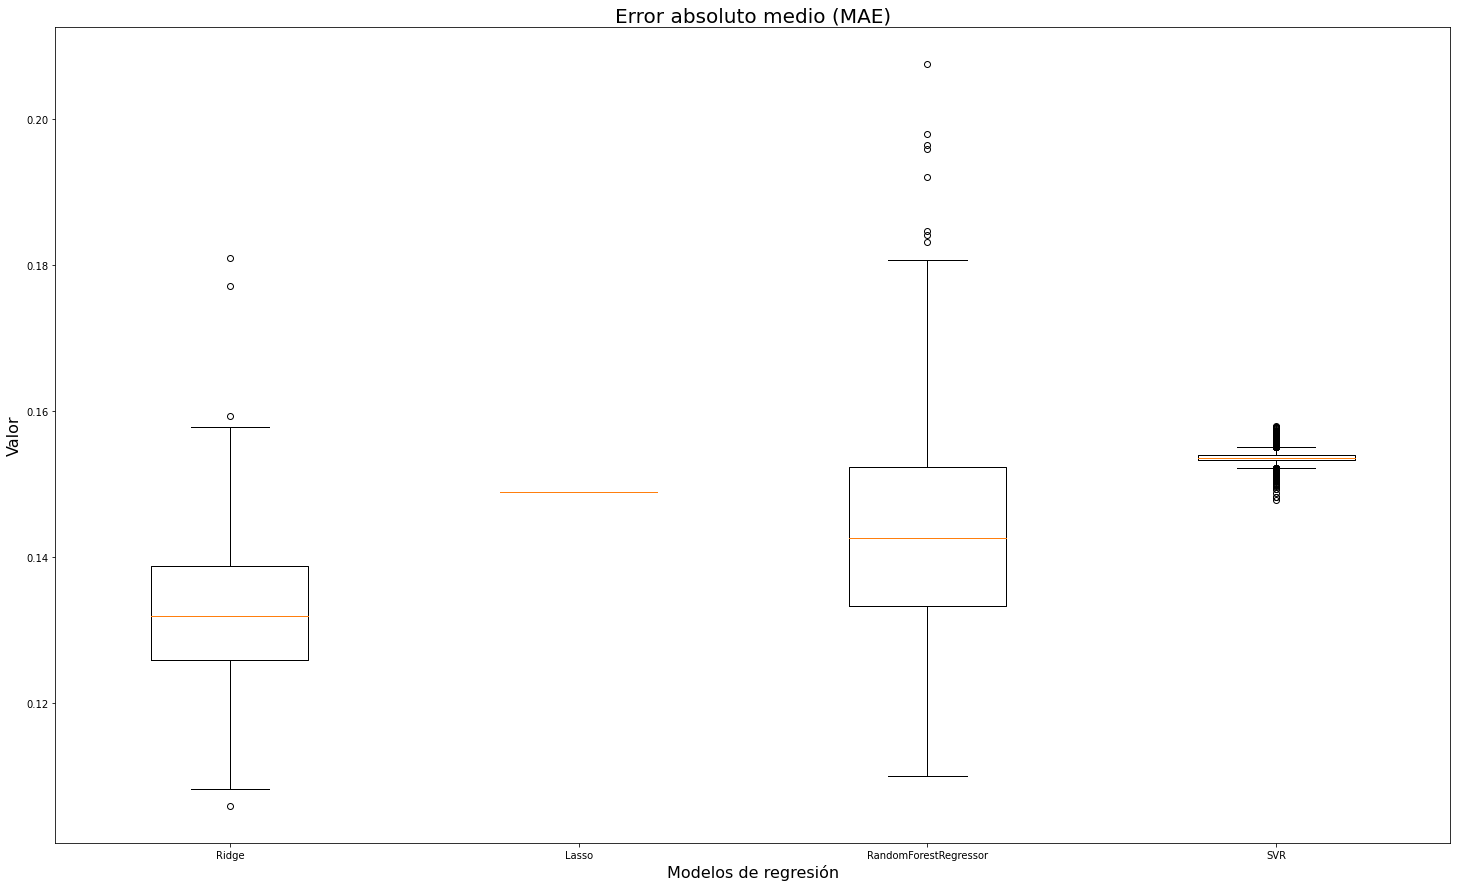

In [25]:
plot_boxplot_metric(data, "MAE")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2b669ee6e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2b669ed150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2b66b331c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2b669ec4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2b669ecc40>],
 'means': []}

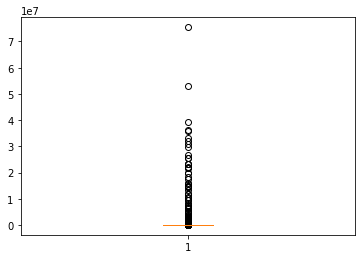

In [44]:
plt.boxplot(x=data["MAE_LinearRegression"])